# Scrap it yourself.

Use scrapy for webscraping

In [1]:
from collections import Counter
import pandas as pd
from io import BytesIO
from pathlib import Path 
import requests

import csv

In [2]:
GUTENBERG_CSV_URL = "https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv.gz"

r = requests.get(GUTENBERG_CSV_URL)
csv_text = r.content.decode("utf-8")

f"Total size: {len(r.content) / 1024**2:0.2f}MB"

'Total size: 14.19MB'

The text as it is right now is not the usual csv format that pandas can read, because this file contains metadata, so we need to work with it a little bit different.

In [4]:
from io import StringIO

next(csv.DictReader(StringIO(csv_text)))

{'Text#': '1',
 'Type': 'Text',
 'Issued': '1971-12-01',
 'Title': 'The Declaration of Independence of the United States of America',
 'Language': 'en',
 'Authors': 'Jefferson, Thomas, 1743-1826',
 'Subjects': 'United States -- History -- Revolution, 1775-1783 -- Sources; United States. Declaration of Independence',
 'LoCC': 'E201; JK',
 'Bookshelves': 'Politics; American Revolutionary War; United States Law'}

In [6]:
austen_books = [book for book in csv.DictReader(StringIO(csv_text)) 
                   if 'Austen' in book['Authors']]

len(austen_books)

42

In [8]:
print(austen_books)

[{'Text#': '105', 'Type': 'Text', 'Issued': '1994-02-01', 'Title': 'Persuasion', 'Language': 'en', 'Authors': 'Austen, Jane, 1775-1817', 'Subjects': 'England -- Social life and customs -- 19th century -- Fiction; Psychological fiction; Young women -- Fiction; Motherless families -- Fiction; Rejection (Psychology) -- Fiction; First loves -- Fiction; Dysfunctional families -- Fiction; Ship captains -- Fiction; Love stories; Regency fiction', 'LoCC': 'PR', 'Bookshelves': ''}, {'Text#': '121', 'Type': 'Text', 'Issued': '1994-04-01', 'Title': 'Northanger Abbey', 'Language': 'en', 'Authors': 'Austen, Jane, 1775-1817', 'Subjects': 'England -- Social life and customs -- 19th century -- Fiction; Satire; England -- Fiction; Young women -- Fiction; Love stories; Gothic fiction; Horror tales -- Appreciation -- Fiction; Books and reading -- Fiction; Gentry -- England -- Fiction; Marriage -- Economic aspects -- Fiction', 'LoCC': 'PR', 'Bookshelves': 'Gothic Fiction'}, {'Text#': '141', 'Type': 'Text'

In [12]:
austen_df = pd.DataFrame.from_dict(austen_books)
austen_df.head(5)

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,105,Text,1994-02-01,Persuasion,en,"Austen, Jane, 1775-1817",England -- Social life and customs -- 19th cen...,PR,
1,121,Text,1994-04-01,Northanger Abbey,en,"Austen, Jane, 1775-1817",England -- Social life and customs -- 19th cen...,PR,Gothic Fiction
2,141,Text,1994-06-01,Mansfield Park,en,"Austen, Jane, 1775-1817",England -- Fiction; Young women -- Fiction; Lo...,PR,
3,158,Text,1994-08-01,Emma,en,"Austen, Jane, 1775-1817",Humorous stories; England -- Fiction; Young wo...,PR,
4,161,Text,1994-09-01,Sense and Sensibility,en,"Austen, Jane, 1775-1817",England -- Social life and customs -- 19th cen...,PR,


In [13]:
austen_titles = austen_df['Title'].unique()
austen_titles

array(['Persuasion', 'Northanger Abbey', 'Mansfield Park', 'Emma',
       'Sense and Sensibility', 'Lady Susan', 'Love and Freindship [sic]',
       'Pride and Prejudice', 'Memoir of Jane Austen',
       'Jane Austen, Her Life and Letters: A Family Record',
       'Gevoel en verstand',
       'The Complete Project Gutenberg Works of Jane Austen\nA Linked Index of all PG Editions of Jane Austen',
       "Raison et sensibilité, ou les deux manières d'aimer (Tome 1)",
       'The Frightened Planet',
       "Raison et sensibilité, ou les deux manières d'aimer (Tome 2)",
       "Raison et sensibilité, ou les deux manières d'aimer (Tome 3)",
       "Pride and Prejudice, a play founded on Jane Austen's novel",
       "Raison et sensibilité, ou les deux manières d'aimer (Tome 4)",
       'Discoveries Among the Ruins of Nineveh and Babylon',
       'The Letters of Jane Austen\r\nSelected from the compilation of her great nephew, Edward, Lord Bradbourne',
       'Old Friends and New Fancies: An 

In [15]:
print(austen_df.loc[austen_df['Title']== 'Persuasion', 'Text#'])

list_persuasion = austen_df.loc[austen_df['Title']== 'Persuasion', 'Text#']
print(list_persuasion[0])

0       105
18    22963
27    36777
Name: Text#, dtype: object
105


In [36]:
GUTENBERG_TEXT_URL = "https://www.gutenberg.org/ebooks/{id}.txt.utf-8"

book_id = list_persuasion[0]
r = requests.get(GUTENBERG_TEXT_URL.format(id=book_id))
text = r.text[1250:]

print(text[:900])

CHAPTER I.


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage; there
he found occupation for an idle hour, and consolation in a distressed
one; there his faculties were roused into admiration and respect, by
contemplating the limited remnant of the earliest patents; there any
unwelcome sensations, arising from domestic affairs changed naturally
into pity and contempt as he turned over the almost endless creations
of the last century; and there, if every other leaf were powerless, he
could read his own history with an interest which never failed. This
was the page at which the favourite volume always opened:

“ELLIOT OF KELLYNCH HALL.


“Walter Elliot, born March 1, 1760, married, July 15, 1784, Elizabeth,
daughter of James Stevenson, Esq. of South Park, in the county of
Gloucester, by


In [31]:
#for name in list_persuasion:
    #r = requests.get(GUTENBERG_TEXT_URL.format(id=book_id))
    #text = r.text[1252:]

In [32]:
from nltk.stem import WordNetLemmatizer
import nltk

In [37]:
pdText = pd.Series(text.split())
pdText

0        CHAPTER
1             I.
2            Sir
3         Walter
4        Elliot,
          ...   
86180         to
86181       hear
86182      about
86183        new
86184    eBooks.
Length: 86185, dtype: object

In [38]:
chaptersIdx = pdText[pdText=='CHAPTER'].index
chaptersIdx

Index([    0,  2611,  4581,  7407,  9204, 12509, 16302, 19735, 23070, 25930,
       29782, 32781, 38311, 41053, 43577, 46386, 48794, 52279, 56400, 58792,
       62284, 69271, 75138, 81701],
      dtype='int64')

In [26]:
chapters=[]
for i in range(len(chaptersIdx)-1):
  start = chaptersIdx[i]
  end = chaptersIdx[i+1]
  chapters.append(pdText[start:end])

len(chapters)

22

Text(0, 0.5, 'Number of Words')

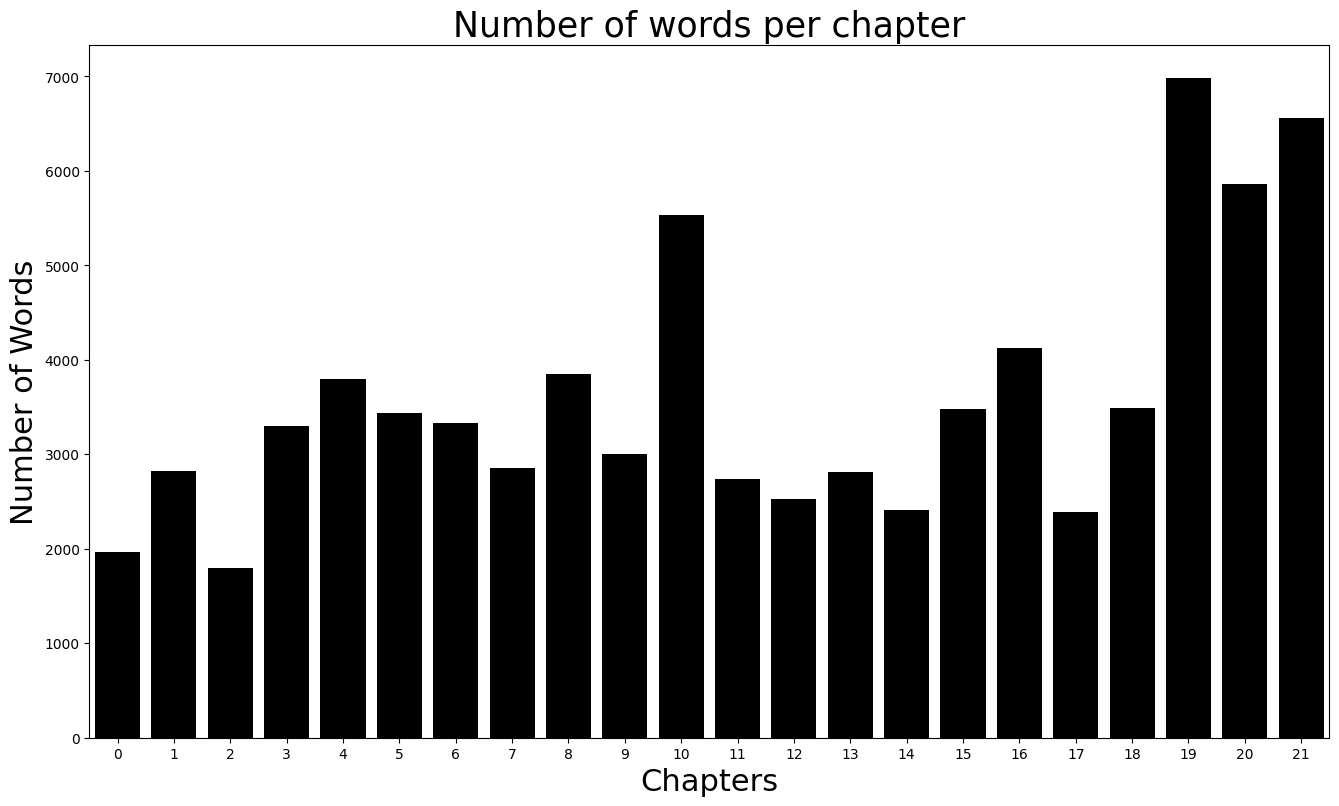

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


x = list(range(len(chapters)))
y = [len(ch) for ch in chapters]
plt.figure(figsize=(16,9))
sns.barplot(x=x,y=y,color='black')
plt.title('Number of words per chapter',fontsize=25)
plt.xlabel('Chapters', fontsize=22)
plt.ylabel('Number of Words',fontsize=22)

In [28]:
lemma = WordNetLemmatizer()

unq_words = []
for i, ch in enumerate(chapters):
  uw = {lemma.lemmatize(word) for word in ch}
  unq_words.append(uw)
y2 = [len(x) for x in unq_words]# 

/var/folders/n6/yjb8n_px3wg30q8vy_hd6m6mmvt5d2/T/ipykernel_77954/3795672139.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legends.legendHandles[0].set_color('cyan')


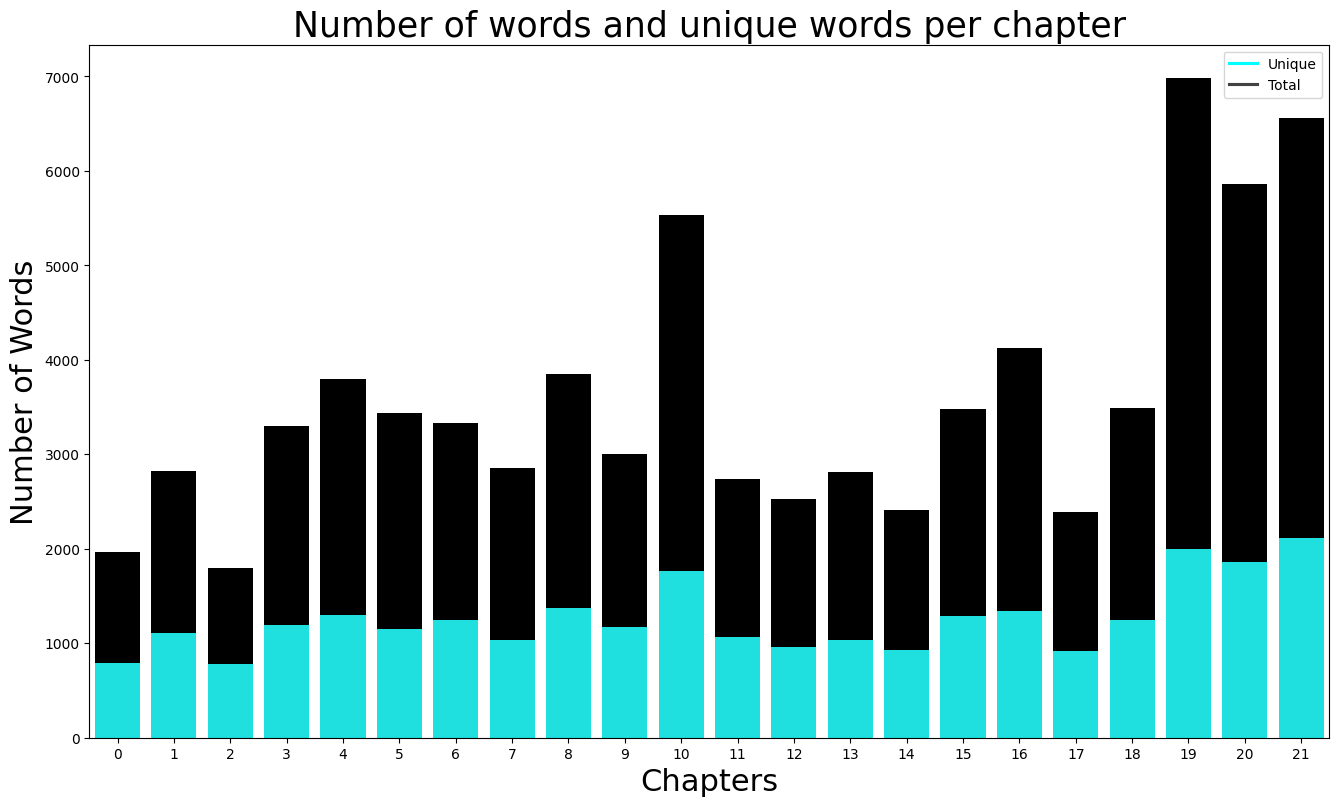

In [29]:
plt.figure(figsize=(16,9))

sns.barplot(x=x,y=y,color='black')
sns.barplot(x=x,y=y2,color='cyan')

plt.title('Number of words and unique words per chapter',fontsize=25)
plt.xlabel('Chapters', fontsize=22)
plt.ylabel('Number of Words',fontsize=22)
plt.legend(labels=['Unique','Total'])

fig = plt.gca()
legends = fig.get_legend()
legends.legendHandles[0].set_color('cyan')

Honorable mentions:

- [IMDB python](https://github.com/santhoshse7en/imdby/)
- [google_search](https://pypi.org/project/googlesearch-python/) [1](https://github.com/QuantumByteStudios/google-search-on-console)
- [research_gate]() [1](https://gist.github.com/dimitryzub/eee343faac72cb8b9894099e034381eb) [2](https://serpapi.com/blog/web-scraping-all-researchgate-publications-in-python/)
- [wikipedia](https://pypi.org/project/wikipedia/)[1](https://github.com/goldsmith/Wikipedia)[2](https://www.mediawiki.org/wiki/Manual:Pywikibot)



# Scrapy

This part is not to be run in a notebook, but instead to have them as separate code. 

**NOTE:** All of the commands that are inside of this [] you can name them differently that the example. 

## Step 1: Creating a scrapy project

Requirements to use scrapy:

All of this process can be done directly from the console, but we strongly suggest to use Visual Code to complete the process.

A virtual enviroment of python 3.9. Please refer to other wiki pages to make this environment.

- `conda create -n [scrape] python=3.9 -y`
- `conda activate scrape`

Install the necesesary packages:

- pip install scrapy

Now to create a project, we just type in the terminal:

- `scrapy startproject [name_of_the_project]`

**NOTES:** Helpful command line commands:

- `cd`: If done by itself, it lets you go back to the root folder. If done as `cd ..` lets you go back to the previous folder. If done as `cd Folder_name` lets you go inside the folder named Folder_name, if this folder exists in the current directory.

- `ls`: This command lets you know all of the files and folders that are stored in the current directory you are on. If you run this just after creating a new scrapy project, the output should look like this:


```
├── [name_of_the_project]
│   ├── [name_of_the_project]
│   │   ├── spiders
│   │       ├── `__init__.py`
│   │   ├── `__init__.py`
│   │   ├── `items.py`
│   │   ├── `middlewares.py`
│   │   ├── `pipelines.py`
│   │   ├── `settings.py`
│   ├── scrapy.cfg
└── 
```




Let's explain a bit about each code:

The code `items.py`, `middleware.py` and `pipeline.py` are little helper tools that can become really useful if we are scrapping anything more that one page. Everything happens in the spiders folder, so any repetitive actions or functions, we can add them to these codes, so we can leave the spiders folder as clean as possible.

We will work mainly with the spider folder.

## Step 2: Create your first spider

For this part, we are going to be using a specific page that was designed to be scraped, meaning that it does not have bot detection in place, so we can browse it freely. You can change the page to which ever page you want to scrape. In the workshop, we will discuss the diference.


To access the scrapable page, we can go to [This link](https://books.toscrape.com/)

Now, part of building a spider is knowing where things are in the page. For this, we need to see the HTML source of the page. To access that, just right-click in any item in the page and scroll to the `Inspect` option. 

There we will be able to see what that item contains in the developer window.

Now, to start your first spider, inside our terminal we need to be inside the spiders folder, and with our virtual enviroment activated. Once we made sure we are in the correct place, we can go ahead and type:

`scrapy genspider [name_of_spider] [site_to_scrape]`

In this example, make sure that the site to scrape is the home one, and you do not have to add the https:// or the end slash.

For this example, the command would look like this:

`scrapy genspider bookspider books.toscrape.com`

Now if we run this, we can go to the spiders folder, and a new python code should have generated. In this case is the basic template and it should look something like this:

In [ ]:
# The new code generated by the example code above:

import scrapy

class BookspiderSpider(scrapy.Spider):
    name = 'bookspider'
    allowed_domains = ['books.toscrape.com']
    start_urls = ['http://books.toscrape.com/']

    def parse(self, response):
        pass


Now, this step is not nesesary, since we can just change the code directly from the last code (the bookspider.py code), but a useful tool would be to use the console to see the changes before applying them. For this, we want to install the next library in our enviroment. We go back to our terminal and type:

`pip install ipython`


Once it is installed, we will go to the `scrapy.cfg` code in our main folder and give the nesesary permisions to use this in the console. 

In the [settings] section, we just add:

`shell = ipython`

We save it, and then we can go to the terminal and run:

`scrapy shell`



We are going to explore the CSS and html code for the page we choose. Some important commands to remember:

- fetch
- response
- crawl

The first step is to fetch the website we want to scrape:

`fetch('')`

For this example is : `fetch('https://books.toscrape.com/')`

Then we can check the response of the website by typing

`response`

For this example is: `response.css('article.product_pod')`

If everything went well, our status code should be 200. If you get anything different and you want to know what it means, you can check [this link](https://http.dev/status#:~:text=HTTP%20responses%20are%20always%20accompanied,between%20a%20client%20and%20server.) to see what each different status code mean.

If our response is succesfull, we can go ahead and isolate the item we want to see. 

`response.ccs('')`

### Now, how do we...

- store all of the books in one variable?
- see how many items we have stored?
- store only the first book in one variable?

Now that we divided the variables into all books and single book, we go back to the webpage to extract some more information. For this example the individual variable is called book.

**Example:** To get the displayed title of the book

`book.css('[the_containers]').get()`

This will give you the tile as is displayed. If you want the whole title of the book, we need to change it to take into account the atribute that aligns with the title.

`book.css('[the_containers]').attrib['']`

This can be used in different ways.

### Please try...

- to have as response the url to see more of the book.
- print the price of the book.

So now that we know the positions we want to scrape, we can modify the spider (the parse function) to do it in an iterative way.

### We want to:

Have an iterative process that takes all of the books from a page, and returns the name, price and url of each one.

In [ ]:
# This is the isolated function. you should modify this in your spider code.

def parse(self, response):
    books = response.css('article.product_pod')
    for book in books:
        yield {
            'name' : book.css('h3 a::text').get(),
            #Alternative: book.css('h3 a').attrib['title']
            'price' : book.css('.product_price .price_color::text').get(),
            'url' : book.css('h3 a').attrib['href'],
        }

## Step 3: Navigate through the page with your spiders

### For the next steps we want to...

- Modify the function so we can get all of the books from all of the pages.
- For the `next` button, what are the different ways to see the url for it.


So what is the logic for us to continue to scrape the website until there is no more pages left?

- ...


NOTE: For this we are going to use a new command called `follow()`

So how is our function looking like now:

In [ ]:
def parse(self, response):
    books = response.css('article.product_pod')
    for book in books:
        yield {
                'name' : book.css('h3 a::text').get(),
                #Alternative: book.css('h3 a').attrib['title']
                'price' : book.css('.product_price .price_color::text').get(),
                'url' : book.css('h3 a').attrib['href'],
            }
    next_page = response.css('li.next a::attr(href)').get()
    #Alternative:  response.css('li.next a').attrib['href']
    if next_page is not None:
        next_page_url = 'http://books.toscrape.com/' + next_page
        yield response.follow(next_page_url, callback = self.parse)

Seeing the results from the last update:

- What can you notice from the scraped items?
- How can we improve the code to catch this error?


Note:  We use something different for the next page url catcher. `urljoin()`

In [ ]:
def parse(self, response):

    books = response.css('article.product_pod')
    for book in books:
        yield {
                'name' : book.css('h3 a::text').get(),
                #Alternative: book.css('h3 a').attrib['title']
                'price' : book.css('.product_price .price_color::text').get(),
                'url' : book.css('h3 a').attrib['href'],
            }
    next_page =response.css('li.next a::attr(href)').get()
    if next_page is not None:
        next_page_url = response.urljoin(next_page)
        yield response.follow(next_page_url, callback = self.parse)
    


Seeing the results from the last update:

- What is different now?

## Step 4: Extract data from each item of all pages

Now that we know how to access certain data form each item, how do we...

- Change our original function to parse not only the next page, but the next item.
- Create a new function that helps us to scrape specific data from each item.

We start by modifying the original `parse` function

In [ ]:
def parse(self, response):
    books = response.css('article.product_pod')
    for book in books:
        relative_url = book.css('h3 a ::attr(href)').get()
        book_url = response.urljoin(relative_url)
        yield response.follow(book_url, callback=self.parse_book_page)

    next_page = response.css('li.next a ::attr(href)').get()
    if next_page is not None:
        next_page_url = response.urljoin(next_page)
        yield response.follow(next_page_url, callback=self.parse)

def parse_book_page(self, response):
    table_rows = response.css("table tr")
        
    yield {
            'url' : response.url,
            'title' : response.css('.product_main h1::text').get(),
            'product_type': table_rows[1].css("td ::text").get(),
            'price_excl_tax': table_rows[2].css("td ::text").get(),
            'price_incl_tax': table_rows[3].css("td ::text").get(),
            'tax': table_rows[4].css("td ::text").get(),
            'availability': table_rows[5].css("td ::text").get(),
            'num_reviews': table_rows[6].css("td ::text").get(),
            'stars' : response.css("p.star-rating").attrib['class'],
            'category' : response.xpath("//ul[@class='breadcrumb']/li[@class='active']/preceding-sibling::li[1]/a/text()").get(),
            'description' : response.xpath("//div[@id='product_description']/following-sibling::p/text()").get(),
            'price': response.css('p.price_color ::text').get(),
        }
    # https://stackoverflow.com/questions/70462844/interpreting-callbacks-and-cb-kwargs-with-scrapy

For the last code, we are going to break down the explanation for the path we selected:

`//ul[@class='breadcrumb']/li[@class='active']/preceding-sibling::li[1]/a/text()").get()`

So, if we go to the page and select inspect on the area where we access the category, we go by different sections. The first section is the one that encapsulates the whole "path" section. This is the:

`ul class = "breadcrumb"`

After that, we have several `li` tags. In this case, this is a solution that works specifically for this problem, and that you might want to adjust when working with your own project. In this case, the logic is that the category is one place before the name of the book, so we can interpret it as:

`li[@class='active']`

This will take us to the name of the book, and since we know we want the name before it, we complement this with:

`preceding-sibling::li[1]`

Which means we take the preceding argument. The `a/text()` and `get()` arguments might seem familiar, as we want to collect the text inside the container we just accesed, and get the information inside the variable `category`. 

### Whats next?

- Follow the path for the `description` variable. Does it make sense to you how do we get the description?

Now the parse book function allows you to scrape the info for each book, you can decide what information you want in your output. 

Something different you can try is to save everithing directly to a csv file, so that you can start working with it straight away. To do this, we run in the terminal (outside of the scrapy shell):

`scrapy crawl bookspider -o bookdata.csv`

In [ ]:
def parse(self, response):
    books = response.css('article.product_pod')
    for book in books:
        relative_url = book.css('h3 a ::attr(href)').get()
        book_url = response.urljoin(relative_url)
        yield response.follow(book_url, callback=self.parse_book_page)

    next_page = response.css('li.next a ::attr(href)').get()
    if next_page is not None:
        next_page_url = response.urljoin(next_page)
        yield response.follow(next_page_url, callback=self.parse)

def parse_book_page(self, response):
    table_rows = response.css("table tr")
        
    yield {
            'url' : response.url,
            'title' : response.css('.product_main h1::text').get(),
            'category' : response.xpath("//ul[@class='breadcrumb']/li[@class='active']/preceding-sibling::li[1]/a/text()").get(),
            'description' : response.xpath("//div[@id='product_description']/following-sibling::p/text()").get(),
            'price': response.css('p.price_color ::text').get(),
        }

Now, I have just used the type of data that I need, and saved it in a csv folder. To access it, we can just call the pandas library and see our new dataset.

In [2]:
import pandas as pd

dataset = pd.read_csv('bookscraper/bookscraper/bookdata.csv')

dataset.head()

,url,title,category,description,price
0,https://books.toscrape.com/catalogue/mesaerion...,Mesaerion: The Best Science Fiction Stories 18...,Science Fiction,"Andrew Barger, award-winning author and engine...",£37.59
1,https://books.toscrape.com/catalogue/the-black...,The Black Maria,Poetry,"Praise for Aracelis Girmay:""[Girmay's] every l...",£52.15
2,https://books.toscrape.com/catalogue/the-boys-...,The Boys in the Boat: Nine Americans and Their...,Default,For readers of Laura Hillenbrand's Seabiscuit ...,£22.60
3,https://books.toscrape.com/catalogue/set-me-fr...,Set Me Free,Young Adult,Aaron Ledbetter’s future had been planned out ...,£17.46
4,https://books.toscrape.com/catalogue/starving-...,"Starving Hearts (Triangular Trade Trilogy, #1)",Default,"Since her assault, Miss Annette Chetwynd has b...",£13.99


## Step 4: Store your data

For this step, we already started to do it with the csv file. But how can I store data from a different format?



In [ ]:
def parse(self, response):
    books = response.css('article.product_pod')
    for book in books:
        relative_url = book.css('h3 a ::attr(href)').get()
        book_url = response.urljoin(relative_url)
        yield response.follow(book_url, callback=self.parse_book_page)

    next_page = response.css('li.next a ::attr(href)').get()
    if next_page is not None:
        next_page_url = response.urljoin(next_page)
        yield response.follow(next_page_url, callback=self.parse)


def parse_images (self,response):
    
    pass